# Quick Visualisation of Tags for everyone!

This notebook aims to give a quick understadning about the Tags which are provided with the train.csv dataset. I personally think the way to know how to take an opportunity (1) or pass an opportunity (0) depends on the understanding on feature. For example, if 30-day volumne of a certain stocks is vergy high over 2-3days and the 30-day stock price over the same period is moving downwards then would you trade on that stock? (probably not, hence action_ij == 0 at least that is the basic logic :)) 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#pip install datatable in console command to use this lib
import pandas as pd
import datatable as dt
import numpy as np
import os

In [ ]:
#df = dt.fread('../input/jane-street-market-prediction/train.csv').to_pandas()

train = dt.fread('../input/jane-street-market-prediction/train.csv').to_pandas()
features = dt.fread('../input/jane-street-market-prediction/features.csv').to_pandas()


The above cannot be used when submitting as the internet will be disabled so when submitting please use the standad pandas lib. I have used this for EDA purposes only. 

**Tag Heat Map** which feature uses which tag? the answer can be visualised

In [ ]:
features.style.applymap(lambda x: 'background-color : yellow' if x == True else '')

# Tag distributions

**Tag with highest distribution** which tag was used the most? can we see pattern here? just think about this :)

In [ ]:
import plotly
pd.options.plotting.backend = 'plotly'
plotly.offline.init_notebook_mode (connected = True)

features_dist = features[features == True].count().sort_values(ascending = False)
features_dist.plot(kind = 'bar')


# Features with tags

**Feature and tags** for each feature what kind of tags do we have? perhaps some features special *cough* *cough*

In [ ]:
features.set_index('feature', inplace = True)

In [ ]:
def features_with_tags(df):
    features_ds = df[df]
    cols = features_ds.columns
    number_cols = len(features_ds.index)
    list_df = []
    
    for idx_col in range(0, number_cols):
        ds = features_ds.iloc[idx_col]
        ds = ds[ds == 1].to_frame()
        ds.reset_index(inplace = True)
        
        cols_ds = ds.columns
        ds[cols_ds[1]] = ds[cols_ds[0]]
        ds.drop(cols_ds[0], axis = 1, inplace = True)
        list_df.append(ds)
    
    out_df = pd.concat(list_df, axis = 1, sort = False).T
    out_df.fillna('None', inplace = True)
    
    
    return out_df
    
    

In [ ]:
features_with_tags_df = features_with_tags(features)
features_with_tags_df.style.applymap(lambda x: 'background-color : yellow' if x == 'None' else '')

So I am going to end my commentary on this topic here. Please use this as information to your liking, I don't want to give any answers as the EDA part of this dataset can be a bit weird and you may come up with theories. For example, feature_0 maybe the futures index.
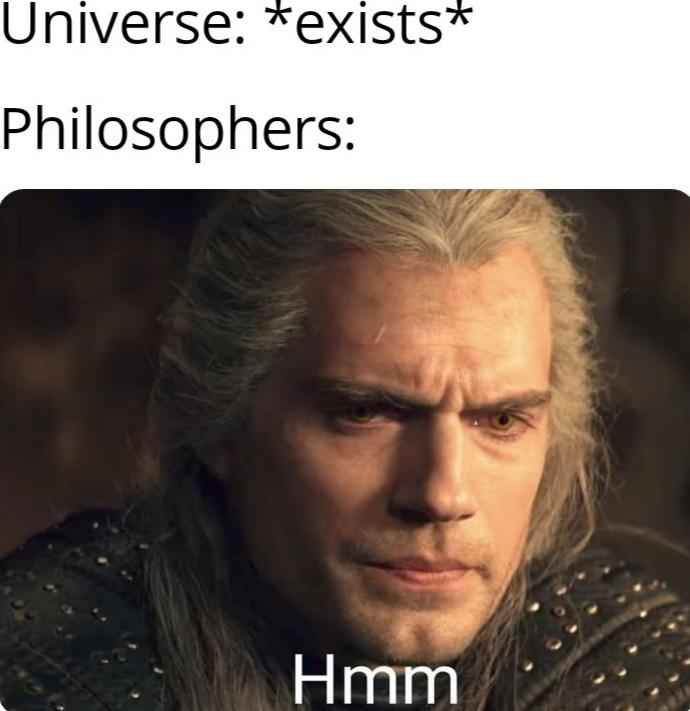